# Cars Analysis

The dataset for this project was taken from the Kaggle website. Dataset contain 8 columns Name,Year,Selling price, Km_driven,Fuel,owner,transmission and seller-type

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:

dataset_url = 'https://www.kaggle.com/datasets/akshaydattatraykhare/car-details-dataset'  

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aliameer1939
Your Kaggle Key: ········


100%|██████████| 55.9k/55.9k [00:00<00:00, 30.5MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './car-details-dataset'

In [5]:
import os
os.listdir(data_dir)

['CAR DETAILS FROM CAR DEKHO.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "Cars_analysis" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aliameer1939/cars-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/aliameer1939/cars-analysis


'https://jovian.com/aliameer1939/cars-analysis'

## Data Cleaning and Preprocessing





In [10]:
import pandas as pd

In [11]:
car_df = pd.read_csv(data_dir + "/CAR DETAILS FROM CAR DEKHO.csv")

In [12]:
car_df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


Removing the numbers and other extra information from name column

In [13]:
car_df['model'] = car_df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
car_df['model'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: model, dtype: int64

Forming a new data frame with updated name column as model

In [14]:
Mcar_df=car_df[['model','year','selling_price','km_driven','fuel','seller_type','transmission','owner']]
Mcar_df

,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [15]:
Mcar_df.isnull().sum()

model            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [16]:
# Check duplicated row in dataset
Mcar_df[Mcar_df.duplicated()]

,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4308,Maruti,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault,2015,465000,41123,Diesel,Dealer,Manual,First Owner
4311,Toyota,2017,1900000,20118,Petrol,Dealer,Automatic,First Owner


In [17]:
Mcar_df = Mcar_df.drop_duplicates()

Mcar_df.shape

(3550, 8)

In [18]:
Mcar_df.describe()

,year,selling_price,km_driven
count,3550.000000,3.550000e+03,3550.000000
mean,2012.956901,4.746099e+05,69380.056901
std,4.252141,5.108341e+05,47647.754330
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60658.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [19]:
Mcar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3550 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   model          3550 non-null   object
 1   year           3550 non-null   int64 
 2   selling_price  3550 non-null   int64 
 3   km_driven      3550 non-null   int64 
 4   fuel           3550 non-null   object
 5   seller_type    3550 non-null   object
 6   transmission   3550 non-null   object
 7   owner          3550 non-null   object
dtypes: int64(3), object(5)
memory usage: 249.6+ KB


In [20]:
import jovian

In [21]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aliameer1939/cars-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/aliameer1939/cars-analysis


'https://jovian.com/aliameer1939/cars-analysis'

## Exploratory Analysis and Visualization





Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Model

In [23]:
Mcar_df.model.unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [24]:
Mcar_df.model.nunique()

29

In [68]:
car_pct=Mcar_df.model.value_counts() * 100 / Mcar_df.model.count()
car_pct

Maruti           29.774648
Hyundai          17.774648
Mahindra          9.126761
Tata              8.676056
Ford              6.197183
Honda             6.084507
Toyota            4.788732
Chevrolet         4.253521
Renault           3.042254
Volkswagen        2.619718
Nissan            1.464789
Skoda             1.380282
Fiat              0.901408
Audi              0.873239
Datsun            0.816901
BMW               0.704225
Mercedes-Benz     0.591549
Jaguar            0.140845
Mitsubishi        0.140845
Land              0.140845
Volvo             0.112676
Jeep              0.084507
Ambassador        0.084507
MG                0.056338
OpelCorsa         0.056338
Daewoo            0.028169
Force             0.028169
Isuzu             0.028169
Kia               0.028169
Name: model, dtype: float64

In [26]:
Mcar_df.model.count()

3550

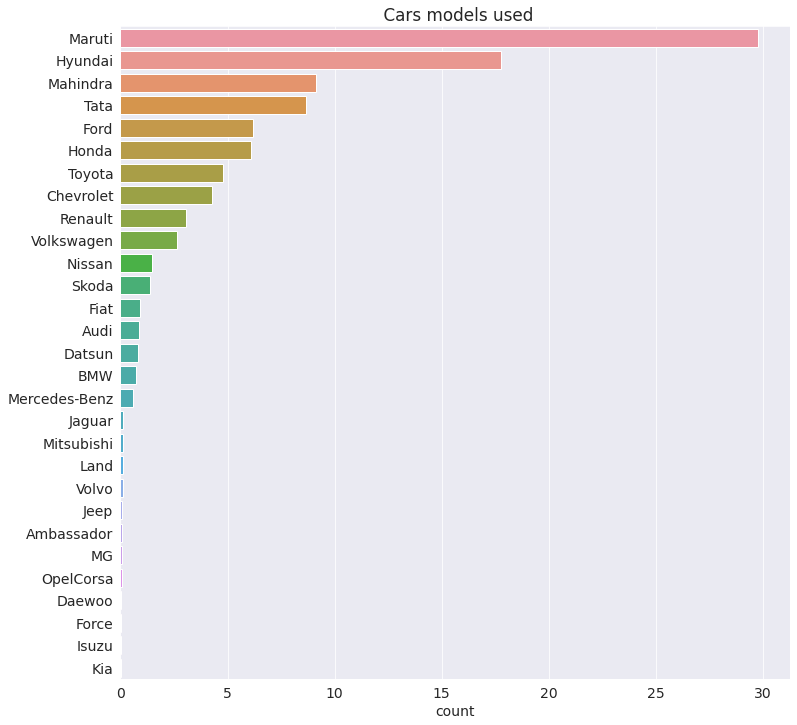

In [69]:
plt.figure(figsize=(12, 12))
sns.barplot(x=car_pct, y=car_pct.index)
plt.title(" Cars models used");
plt.xlabel('count');

# Year

In [28]:
Mcar_df.year.unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

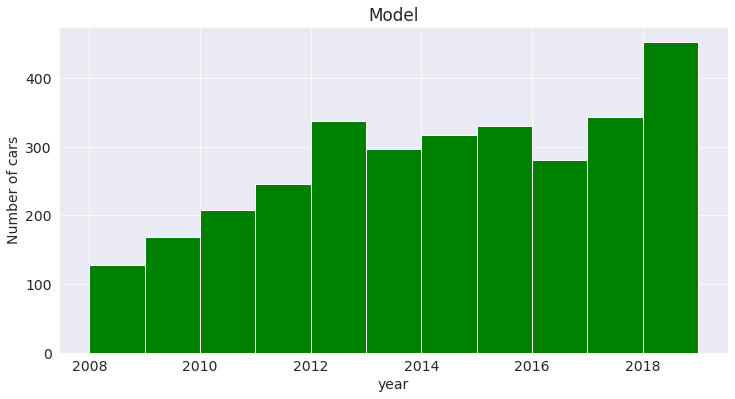

In [29]:
plt.figure(figsize=(12, 6))
plt.title('Model')
plt.xlabel('year')
plt.ylabel('Number of cars')

plt.hist(Mcar_df.year, bins=np.arange(2008,2020,1), color='green');

# Selling_Price

In [57]:
top_prices=Mcar_df.selling_price.value_counts().head(10)
top_prices

300000    134
250000    109
350000    105
500000     86
550000     83
600000     81
150000     81
400000     80
450000     80
650000     64
Name: selling_price, dtype: int64

Text(0, 0.5, '')

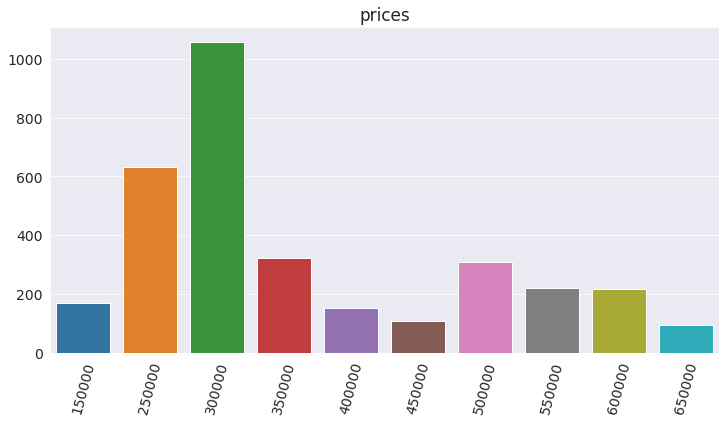

In [58]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('prices')
sns.barplot(x=top_prices.index, y=top_models);
plt.ylabel(None)

# Fuel

In [32]:
Mcar_df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [33]:
fuel_type=Mcar_df.fuel.value_counts()
fuel_type

Diesel      1789
Petrol      1701
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

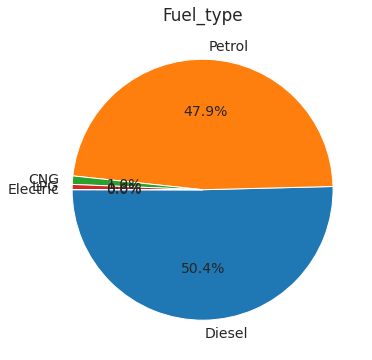

In [34]:
plt.figure(figsize=(12,6))
plt.title('Fuel_type')
plt.pie(fuel_type, labels=fuel_type.index, autopct='%1.1f%%', startangle=180);

# KM_driven

In [35]:
Mcar_df.km_driven.value_counts()

70000     209
120000    198
80000     197
60000     193
50000     179
         ... 
35925       1
40771       1
30500       1
55800       1
112198      1
Name: km_driven, Length: 770, dtype: int64

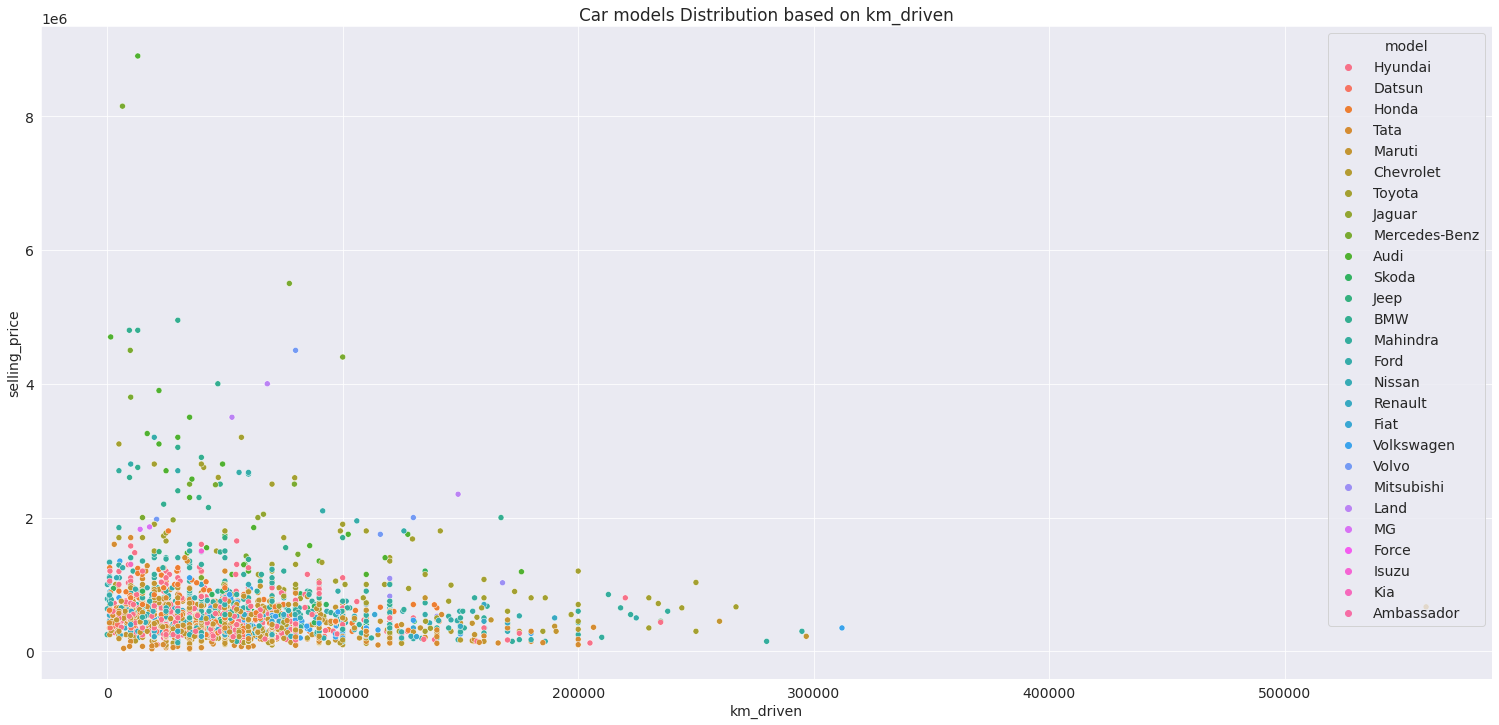

In [36]:
figure=plt.figure(figsize=(26,12))
plt.title('Car models Distribution based on km_driven')
sns.scatterplot(y='selling_price',x='km_driven',hue='model',data=Mcar_df[Mcar_df.year>2010]);

# Seller type

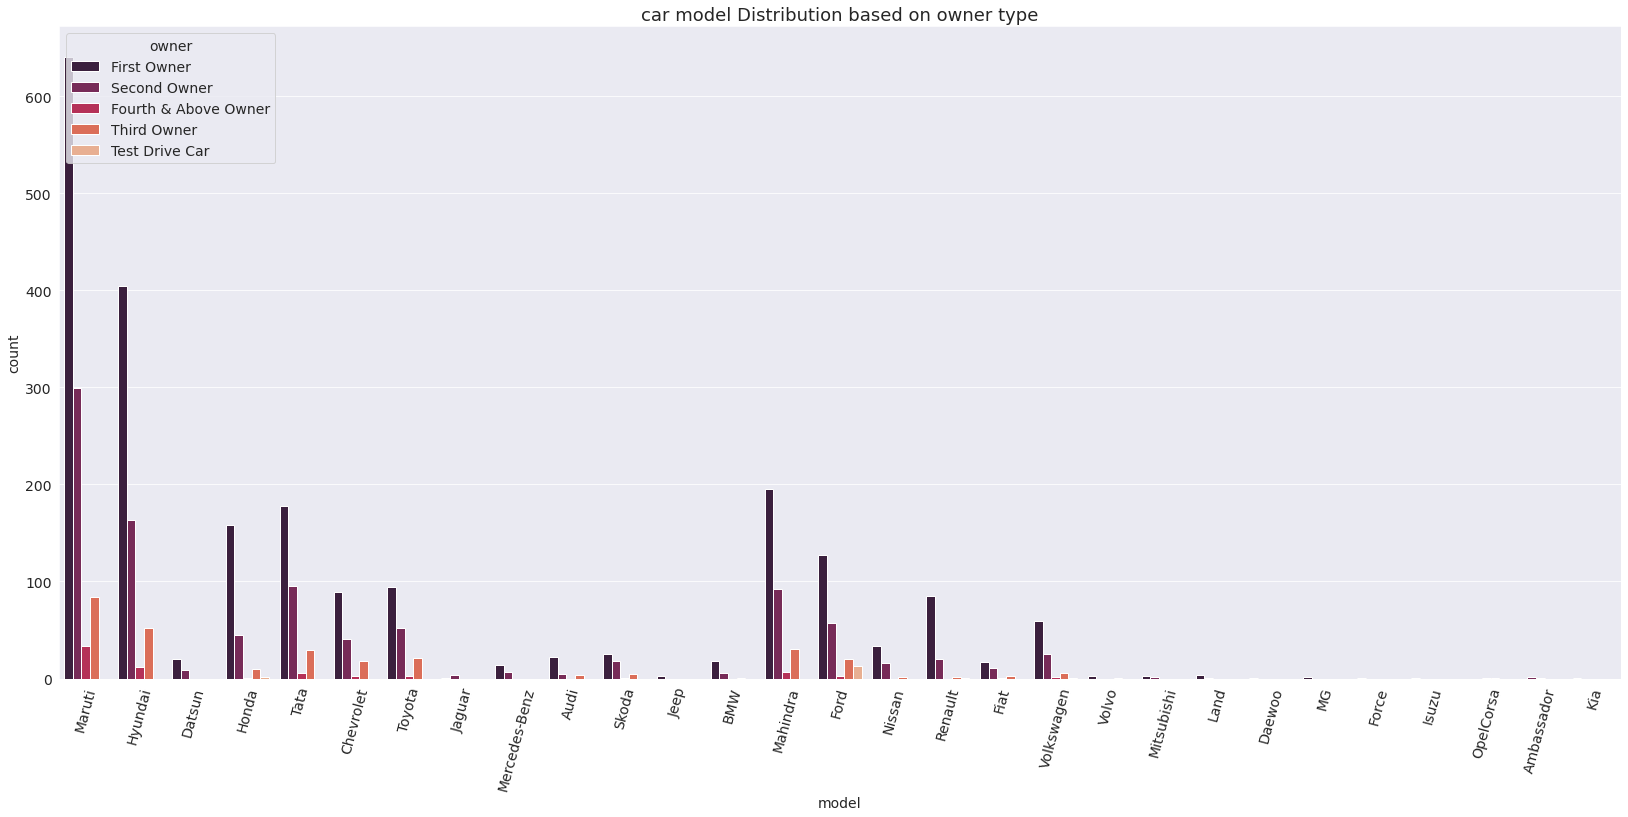

In [37]:
figure = plt.figure(figsize=(28,12))
plt.xticks(rotation=75)
plt.title('car model Distribution based on owner type', fontsize=18)
plot = sns.countplot(x="model", data=Mcar_df, palette='rocket',hue='owner')
plot

plt.show()

# Transmission

In [38]:
Mcar_df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [39]:
trans_type=Mcar_df.transmission.value_counts()
trans_type

Manual       3238
Automatic     312
Name: transmission, dtype: int64

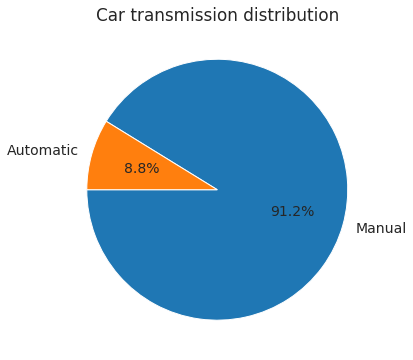

In [40]:
plt.figure(figsize=(12,6))
plt.title('Car transmission distribution')
plt.pie(trans_type, labels=trans_type.index, autopct='%1.1f%%', startangle=180);

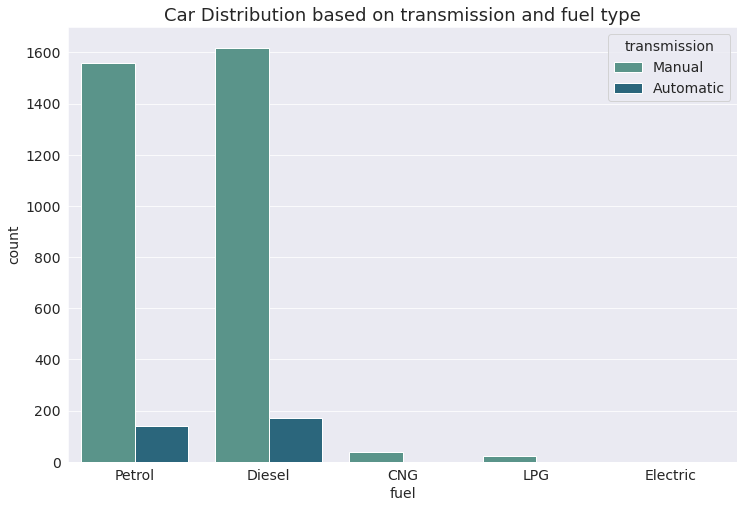

In [41]:
figure = plt.figure(figsize=(12,8))
plt.title('Car Distribution based on transmission and fuel type', fontsize=18)
plot = sns.countplot(x="fuel", data=Mcar_df, palette='crest',hue='transmission')
plot

plt.show()

# Owner Type

In [42]:
owner_types=Mcar_df.owner.value_counts()
owner_types

First Owner             2199
Second Owner             970
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

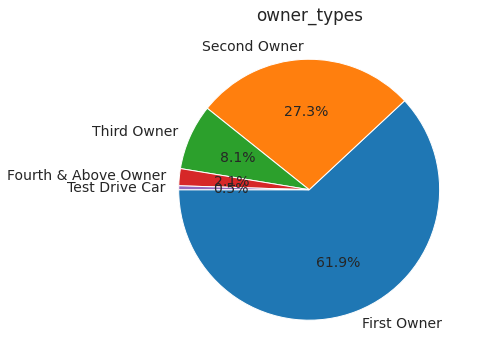

In [43]:
plt.figure(figsize=(12,6))
plt.title('owner_types')
plt.pie(owner_types, labels=owner_types.index, autopct='%1.1f%%', startangle=180);

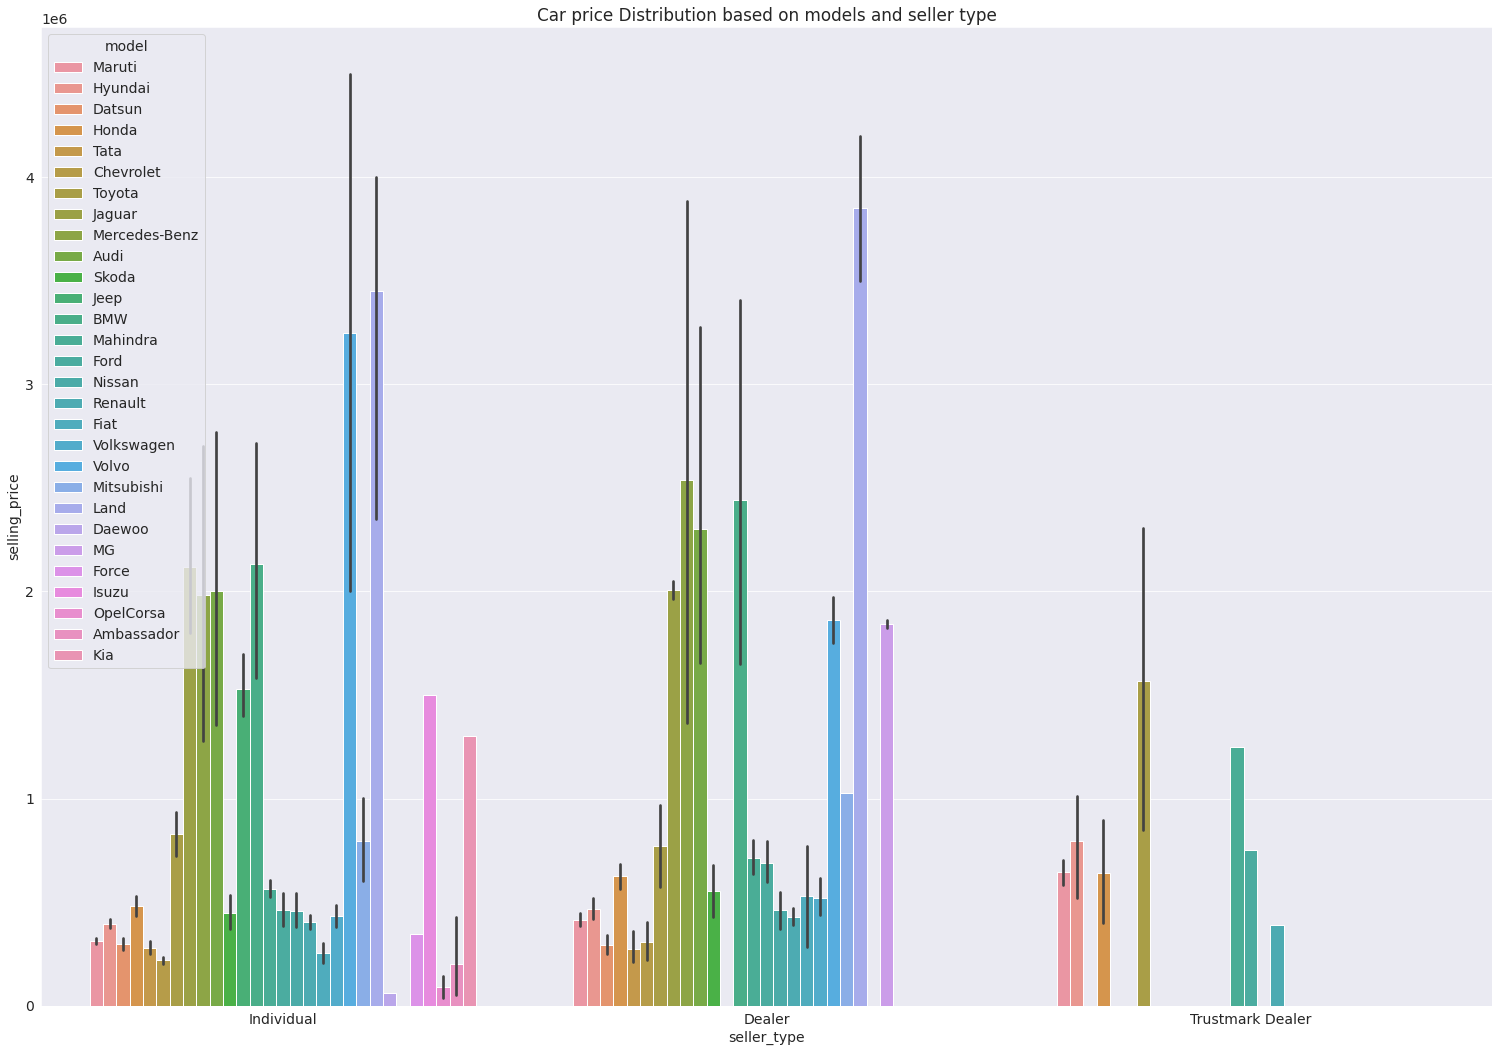

In [45]:
figure=plt.figure(figsize=(26,18))
plt.title('Car price Distribution based on models and seller type')
sns.barplot(x='seller_type',y='selling_price',hue='model',data=Mcar_df);

In [47]:
import jovian

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aliameer1939/cars-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/aliameer1939/cars-analysis


'https://jovian.com/aliameer1939/cars-analysis'

## Asking and Answering Questions





#### Q1: Which car model was more expensive in 2020.

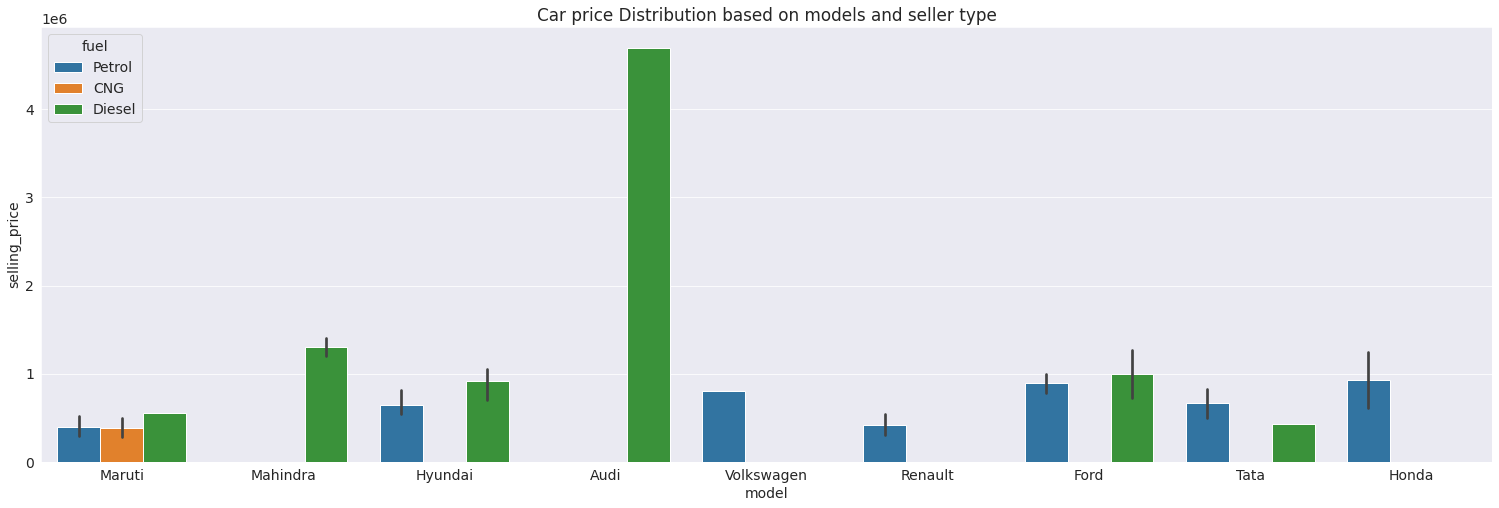

In [61]:
figure=plt.figure(figsize=(26,8))
plt.title('Car price Distribution based on models and seller type')
sns.barplot(x='model',y='selling_price',hue='fuel',data=Mcar_df[Mcar_df.year==2020]);

#### Q2:  Which car models are more expensive in last 5 years based on its transmission type.

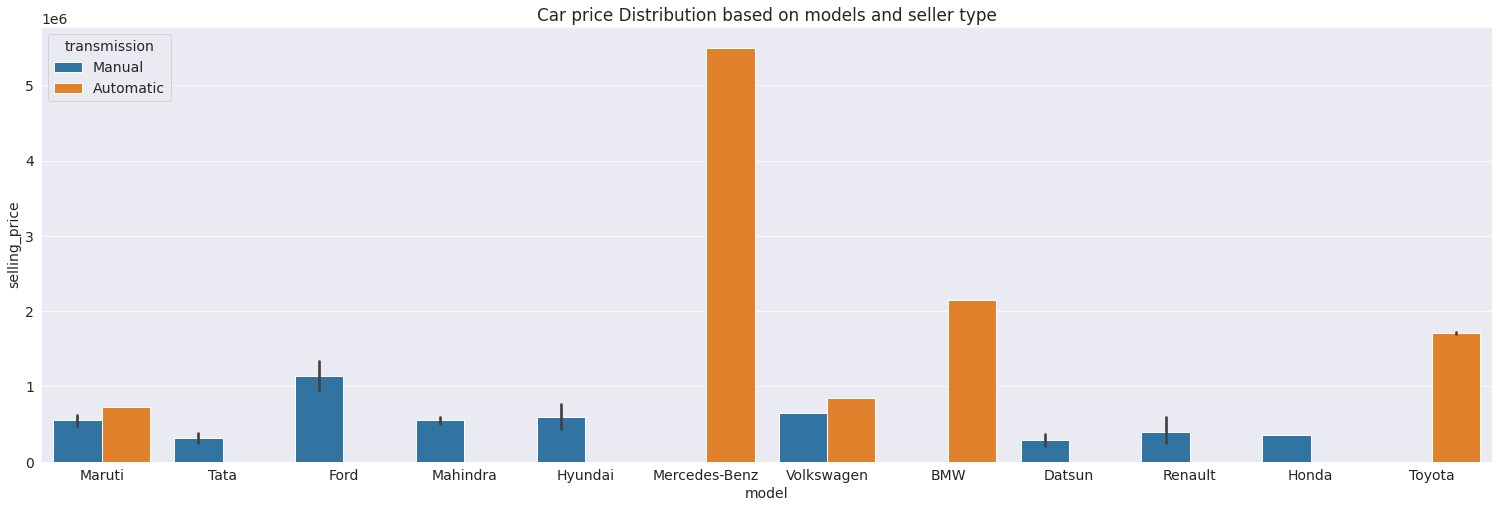

In [144]:
figure=plt.figure(figsize=(26,8))
plt.title('Car price Distribution based on models and seller type')
sns.barplot(x='model',y='selling_price',hue='transmission',data=Mcar_df[Mcar_df.year>2015]);

#### Q3: which car was more used in last 5 years manual or automatic?

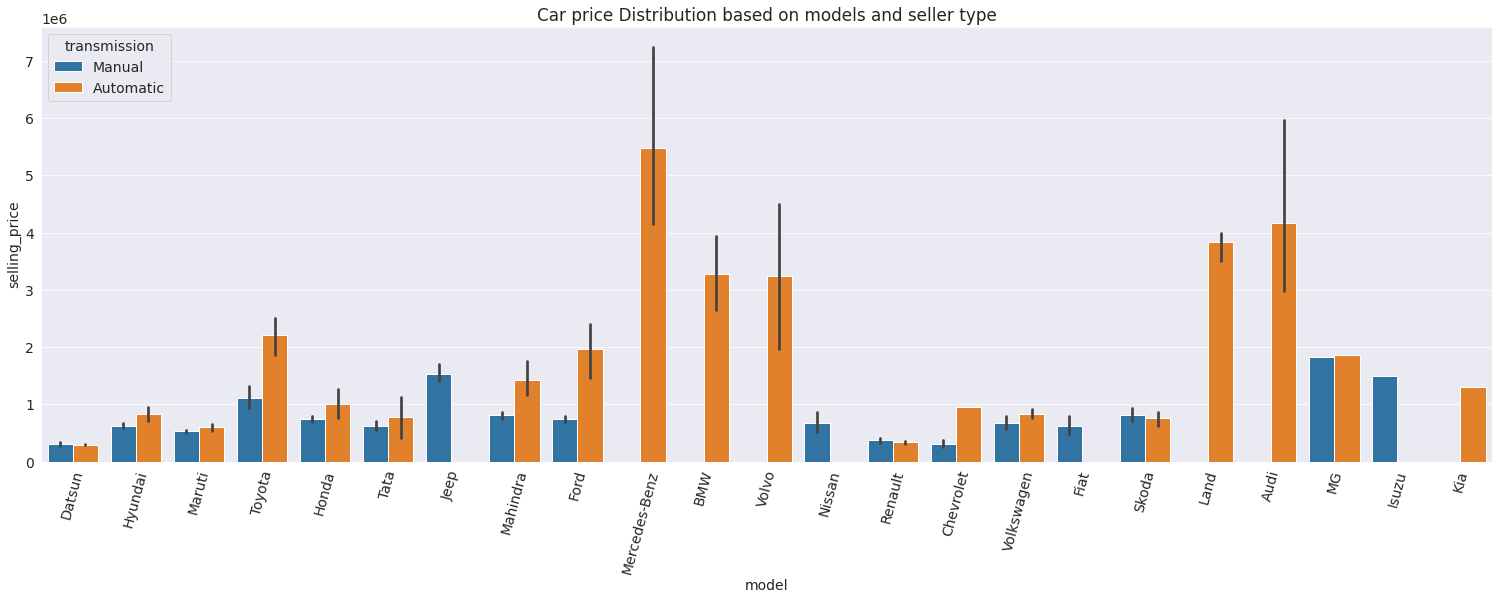

In [74]:
figure=plt.figure(figsize=(26,8))
plt.xticks(rotation=75)
plt.title('Car price Distribution based on models and seller type')
sns.barplot(x='model',y='selling_price',hue='transmission',data=Mcar_df[Mcar_df.year>2015]);

#### Q4: Which Car has more millage in last 5 years?

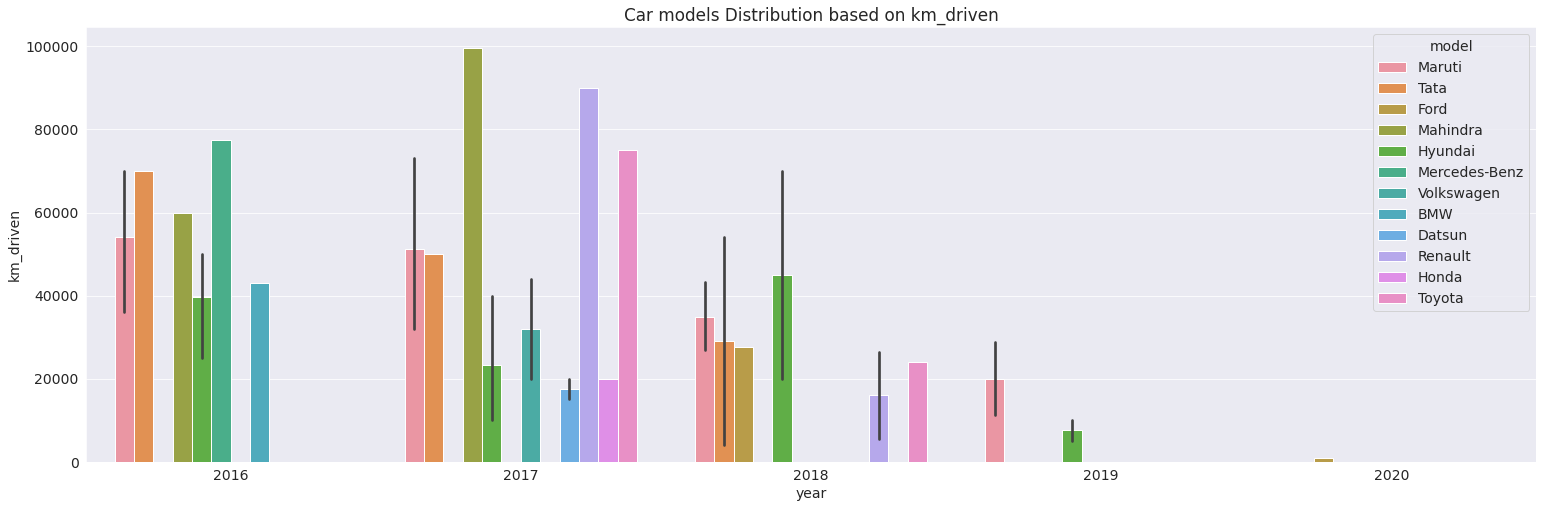

In [146]:
figure=plt.figure(figsize=(26,8))
plt.title('Car models Distribution based on km_driven')
sns.barplot(x='year',y='km_driven',hue='model',data=Mcar_df[Mcar_df.year>2015]);

#### Q5: Cars prices based on Kilometers driven in last 2 years

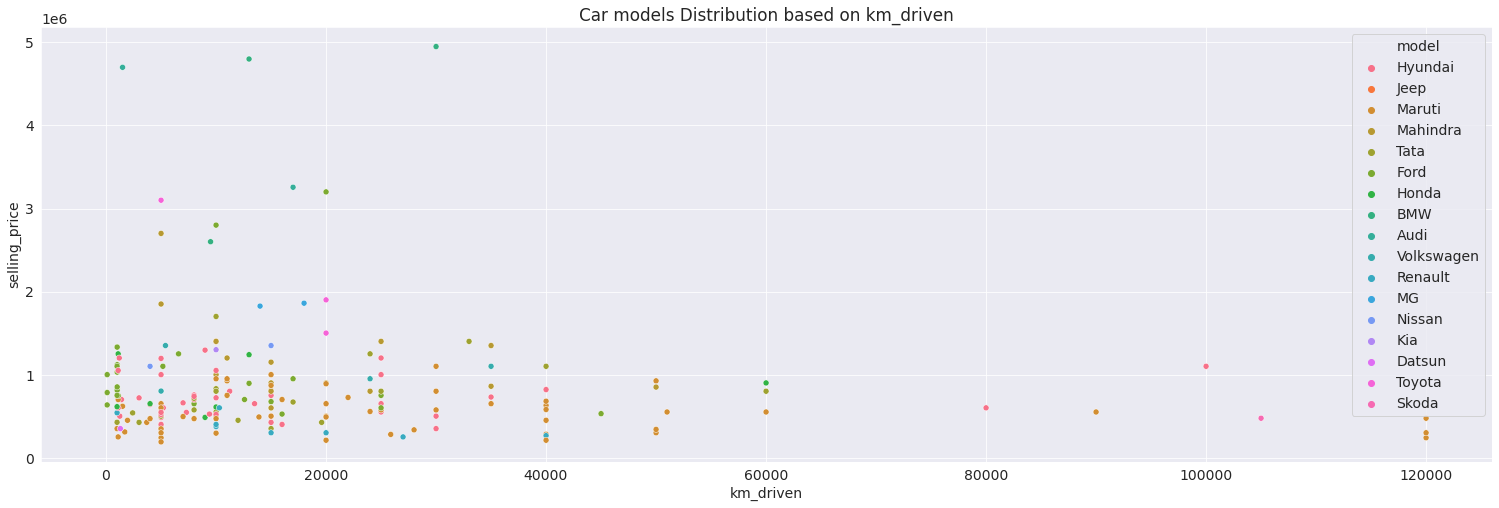

In [70]:
figure=plt.figure(figsize=(26,8))
plt.title('Car models Distribution based on km_driven')
sns.scatterplot(y='selling_price',x='km_driven',hue='model',data=Mcar_df[Mcar_df.year>2018]);

Let us save and upload our work to Jovian before continuing.

In [75]:
import jovian

In [76]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aliameer1939/cars-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/aliameer1939/cars-analysis


'https://jovian.com/aliameer1939/cars-analysis'

In [77]:
import jovian

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aliameer1939/cars-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/aliameer1939/cars-analysis


'https://jovian.com/aliameer1939/cars-analysis'

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [79]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aliameer1939/cars-analysis" on https://jovian.com
